In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os.path 
from tabulate import tabulate

In [2]:
preprocessM0="realM0.dat"

In [3]:
file = open(preprocessM0)
lines = file.readlines()
file.close()
 

In [4]:
x = []
y = []
z = []

In [5]:
#to separate the collumns
for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()
        
    #saving in temporary lists
    x.append(co[0])
    y.append(co[1])
    z.append(co[2])

#to float
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)
z = np.array(z, dtype=float)

In [6]:
y_d = []

for i in range(0,len(y)):
    
    if y[i] not in y_d:
        
        y_d.append(y[i])

In [7]:
y_d

[3800.0,
 3810.0,
 3820.0,
 3830.0,
 3840.0,
 3850.0,
 3860.0,
 3870.0,
 3880.0,
 3890.0,
 3900.0,
 3910.0,
 3920.0,
 3930.0,
 3940.0,
 3950.0,
 3960.0,
 3970.0,
 3980.0,
 3990.0,
 4000.0,
 4010.0,
 4020.0,
 4030.0,
 4040.0,
 4050.0,
 4060.0,
 4070.0,
 4080.0,
 4090.0,
 4100.0,
 4110.0,
 4120.0,
 4130.0,
 4140.0,
 4150.0,
 4160.0,
 4170.0,
 4180.0,
 4190.0,
 4200.0,
 4210.0,
 4220.0,
 4230.0,
 4240.0,
 4250.0,
 4260.0,
 4270.0,
 4280.0,
 4290.0,
 4300.0,
 4310.0,
 4320.0,
 4330.0,
 4340.0,
 4350.0,
 4360.0,
 4370.0,
 4380.0,
 4390.0,
 4400.0,
 4410.0,
 4420.0,
 4430.0,
 4440.0,
 4450.0,
 4460.0,
 4470.0,
 4480.0,
 4490.0,
 4500.0,
 4510.0,
 4520.0,
 4530.0,
 4540.0,
 4550.0,
 4560.0,
 4570.0,
 4580.0,
 4590.0,
 4600.0,
 4610.0,
 4620.0,
 4630.0,
 4640.0,
 4650.0,
 4660.0,
 4670.0,
 4680.0,
 4690.0,
 4700.0,
 4710.0,
 4720.0,
 4730.0,
 4740.0,
 4750.0,
 4760.0,
 4770.0,
 4780.0,
 4790.0,
 4800.0,
 4810.0,
 4820.0,
 4830.0,
 4840.0,
 4850.0,
 4860.0,
 4870.0,
 4880.0,
 4890.0,
 4900.0,
 

In [8]:
len(y_d)

370

In [9]:
kernel = 1 * RBF(length_scale=1., length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-7, 1e-1))
xx = []
yy = []
zz = []

for i in range(0,len(y_d)):
    
    xt = []
    zt = []
    for j in range(0,len(y)):
        
        if y[j] == y_d[i]:
            
            xt.append([x[j]])
            zt.append(z[j]*10**15)
            
    if len(xt) > 5: 
        
        gpr = GaussianProcessRegressor(kernel=kernel,alpha=0.0).fit(xt, zt)
        X_ = np.linspace(-10, 50, 60 + 1)
        y_mean = gpr.predict(X_[:, np.newaxis])

        for j in range(0,len(X_)):

            xx.append(X_[j])
            yy.append(y_d[i])
            zz.append(y_mean[j])

/home/user/.local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.40370166e-04, -3.97417258e-04,  1.49634331e+01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 16, 'warnflag': 2}
  ConvergenceWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.01814326e-03, -2.03331353e-03,  1.91009860e+01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 81, 'nit': 20, 'warnflag': 2}
  ConvergenceWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7.10412860e-06,  2.11656225e-04,  1.95645635e+01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 20, 'warnflag': 2}
  ConvergenceWarning)
/hom

<IPython.core.display.Javascript object>


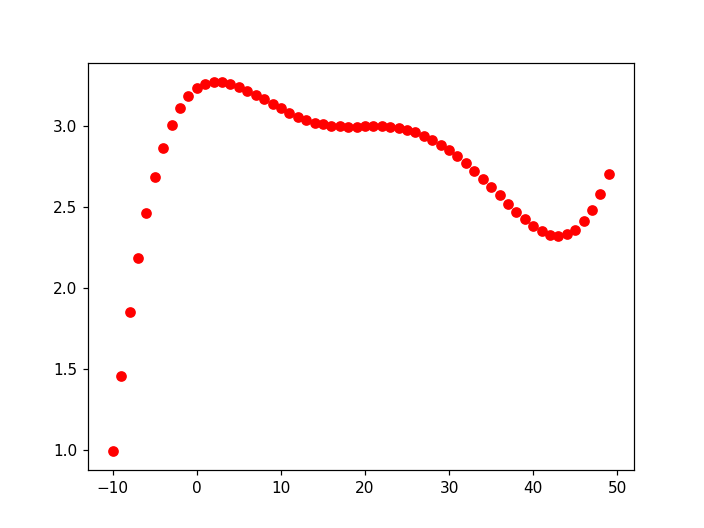

In [10]:
%matplotlib notebook
plt.plot(xt, zt, 'ro')
plt.show()

In [11]:
len(z)

22200

<IPython.core.display.Javascript object>


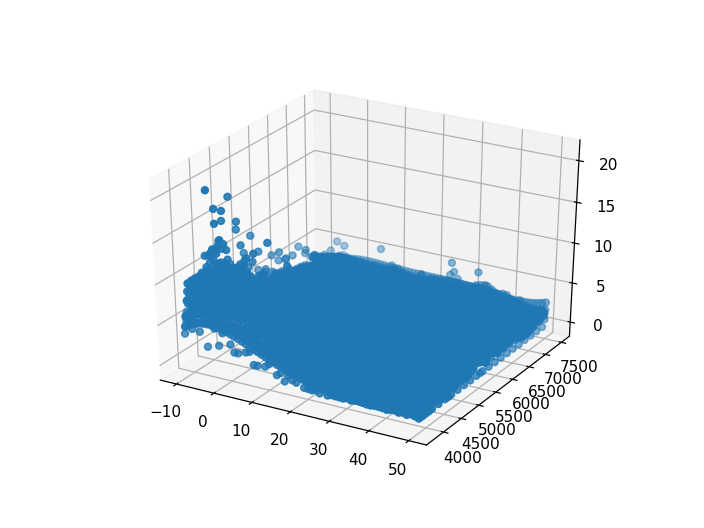

In [11]:
import matplotlib.pyplot as plt

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, zz)
#ax.set_zlim3d(0,0.1e-12)
plt.show()

In [13]:
y_d

[3800.0,
 3810.0,
 3820.0,
 3830.0,
 3840.0,
 3850.0,
 3860.0,
 3870.0,
 3880.0,
 3890.0,
 3900.0,
 3910.0,
 3920.0,
 3930.0,
 3940.0,
 3950.0,
 3960.0,
 3970.0,
 3980.0,
 3990.0,
 4000.0,
 4010.0,
 4020.0,
 4030.0,
 4040.0,
 4050.0,
 4060.0,
 4070.0,
 4080.0,
 4090.0,
 4100.0,
 4110.0,
 4120.0,
 4130.0,
 4140.0,
 4150.0,
 4160.0,
 4170.0,
 4180.0,
 4190.0,
 4200.0,
 4210.0,
 4220.0,
 4230.0,
 4240.0,
 4250.0,
 4260.0,
 4270.0,
 4280.0,
 4290.0,
 4300.0,
 4310.0,
 4320.0,
 4330.0,
 4340.0,
 4350.0,
 4360.0,
 4370.0,
 4380.0,
 4390.0,
 4400.0,
 4410.0,
 4420.0,
 4430.0,
 4440.0,
 4450.0,
 4460.0,
 4470.0,
 4480.0,
 4490.0,
 4500.0,
 4510.0,
 4520.0,
 4530.0,
 4540.0,
 4550.0,
 4560.0,
 4570.0,
 4580.0,
 4590.0,
 4600.0,
 4610.0,
 4620.0,
 4630.0,
 4640.0,
 4650.0,
 4660.0,
 4670.0,
 4680.0,
 4690.0,
 4700.0,
 4710.0,
 4720.0,
 4730.0,
 4740.0,
 4750.0,
 4760.0,
 4770.0,
 4780.0,
 4790.0,
 4800.0,
 4810.0,
 4820.0,
 4830.0,
 4840.0,
 4850.0,
 4860.0,
 4870.0,
 4880.0,
 4890.0,
 4900.0,
 

In [12]:
x_grid = np.linspace(-10, 50, 61)
#y_grid = np.linspace(3800, 7500, 500)
B1, B2 = np.meshgrid(x_grid, y_d, indexing='xy')

<IPython.core.display.Javascript object>


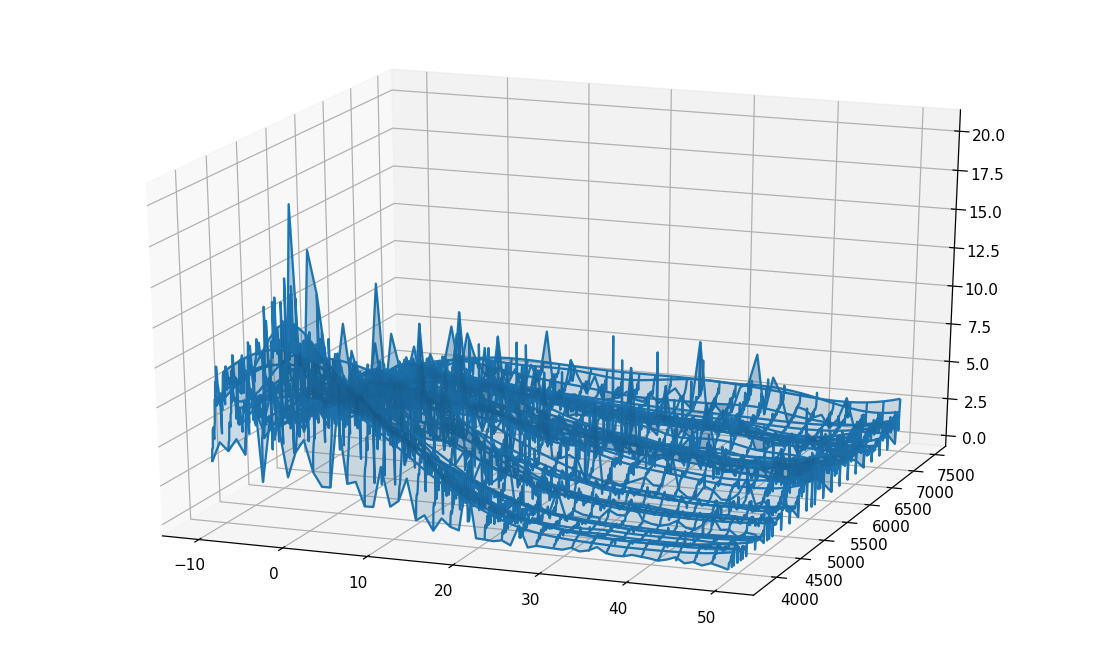

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp
Z = interp.griddata((xx,yy),zz,(B1,B2),method='linear',fill_value = 0,rescale=True)
#Z = splinemean(B1, B2)
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2,linewidth=0)
#ax.scatter3D(xx_test,yy_test,mean_flux, c='r')

plt.show()

In [14]:
save_path = '/home/user/Área de Trabalho/mathematica_analisys/'

table = []
for k in range(0,len(zz)):
    table.append((xx[k], yy[k], zz[k]))


name_of_file = 'M0'

completeName = os.path.join(save_path, name_of_file+".dat")      
    
    
f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()